
# Tutorial 1: Tensor Contractions
Please look at the tutorials [readme](https://www.tensors.net/tutorials) page if you have not done so already. In this tutorial you will learn the basics of manipulating tensors and contracting tensor networks efficiently, including:

- Initialization of tensors

- Diagrammatic notation for tensors and tensor networks

- Manipulation of tensors via **'permute'** and **'reshape'** functions

- Binary tensor contractions and computational costs

- Use of **'ncon'** routine to contract networks

## T1.1: Diagrammatic notation
It is convenient to represent tensor networks using a **diagrammatic notation**, where individual tensors are represented as a solid shape with a number of 'legs' that corresponds to the rank of the tensor. Each leg is here labelled with a dummy index (usually a Latin letter: i, j, k, l…) necessary to relate the equation to the diagram. Some examples are presented below.

**Note: both MATLAB and Julia use 1-based indexing, such that a d-dim index takes values [1,2,...,d] as depicted in the figures below, while Python uses 0-based indexing such that the index takes values [0,1,...,d-1].**

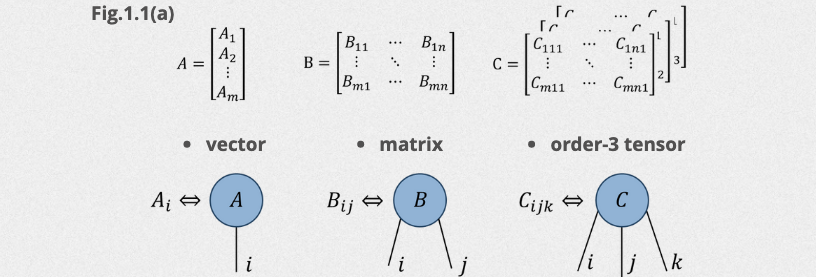

### The order-$n$ tensor is called a $n$-leg tensor.

In [1]:
import numpy as np
# tensor with randomly generated entries, order 3, dims: 2-by-3-by-4
A = np.random.rand(2,3,4)

# identity matrix, order 2, dims: 5-by-5 
B = np.eye(5,5)

# tensor of 1's, order 4, dims: 2-by-4-by-2-by-4
C = np.ones((2,4,2,4))

# matrix of 0's, order 2, dims: 3-by-5
D = np.zeros((3,5))

# initialize complex random tensor
E = np.random.rand(2,3,4) + 1j*np.random.rand(2,3,4)

In [2]:
for i, tensor in enumerate([A, B, C, D, E]):
    print(chr(65+i),"\t {}-leg tensor".format(len(tensor.shape)),"\t Bond dim:", tensor.shape )

A 	 3-leg tensor 	 Bond dim: (2, 3, 4)
B 	 2-leg tensor 	 Bond dim: (5, 5)
C 	 4-leg tensor 	 Bond dim: (2, 4, 2, 4)
D 	 2-leg tensor 	 Bond dim: (3, 5)
E 	 3-leg tensor 	 Bond dim: (2, 3, 4)



The diagrammatic tensor notation is useful for describing networks comprised of multiple tensors. An index shared by two tensors denotes a contraction (or summation) over this index. Examples: 

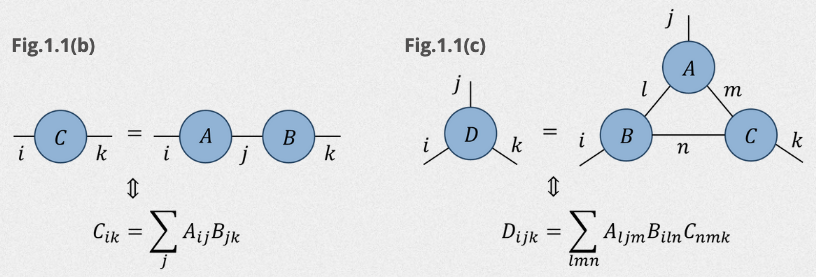

Notice that example in Fig.1.1(b) is equivalent to a matrix multiplication between matrices A and B, while Fig.1.1(c) produces a rank-3 tensor D via the contraction of a network with three tensors. Even in this relatively the simple example, we see that the diagrammatic notation is already easier to interpret than the corresponding index equation. In practice, once we have established a convention for index ordering, we can omit labeling the diagrams with dummy indices which further enhances their clarity.

## T1.2: Permute and reshape operations

Fundamental to the manipulation of tensors are the **'permute'** and **‘reshape’** functions. Permute allows the index ordering of a tensor to be changed (but does not change the number of indices). The reshape function which allows a collection of tensor indices to be combined into a single larger index (or vice-versa), thus can change the number of indices but not the total dimension. In equations, we sometimes bracket subscript indices to denote the combining of indices, while diagrammatically this may be indicated by drawing two tensor indices coming together to form a single index. Often tensor indices of larger dimension are depicted by thicker lines!
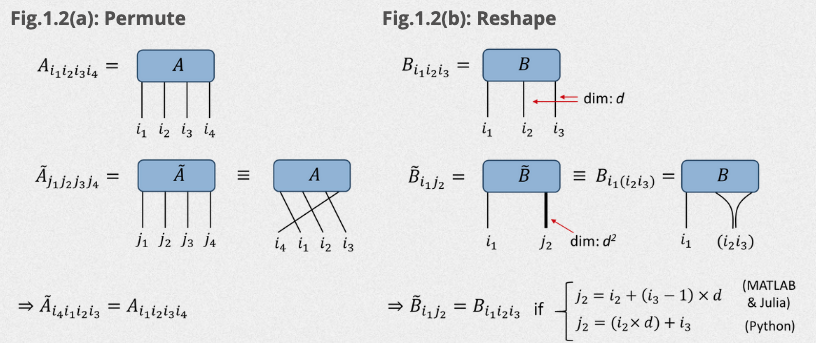

In [3]:
##### Ex.1.2(a):Transpose
A = np.random.rand(4,4,4,4)
Atilda = A.transpose(3,0,1,2)

##### Ex.1.2(b):Reshape
B = np.random.rand(4,4,4)
Btilda = B.reshape(4,4**2)

Technical notes:


- The tensor reshape behaves differently in MATLAB/Julia versus Python due to a difference in convention. Both MATLAB and Julia use column-major order for storing matrices and tensors, such that a $d$-by-$d$ matrix $B_{ij}$ is stored as a length $d^2$ vector vk, with $k = i + (j-1)\times d$. In contrast, Python uses row-major order such that a d-by-d matrix Bij is stored as a vector vk, with k = i×d + j. Fortunately this difference in convention does not often have significant consequences in terms of writing tensor network codes, since the choice of convention is not so important so long as it is consistently applied.



- The permute function reorders the storage of the elements of a tensor in computer memory, thus incurs some (often non-negligible) computational cost. In contrast, the reshape function leaves the elements of a tensor unchanged in memory, instead only changing the metadata for how the tensor is to be interpreted (and thus incurs negligible cost).

## T1.3: Binary tensor contractions

The usefulness of permute and reshape functions is that they allow a contraction between a pair of tensors (which we call a binary tensor contraction) to be recast as a matrix multiplication. Although the computational cost (measured in number of scalar multiplications) is the same both ways, it is usually preferable to recast as multiplication as modern hardware performs vectorized operations much faster than when using the equivalent FOR loop. The steps for doing this are outlined below:

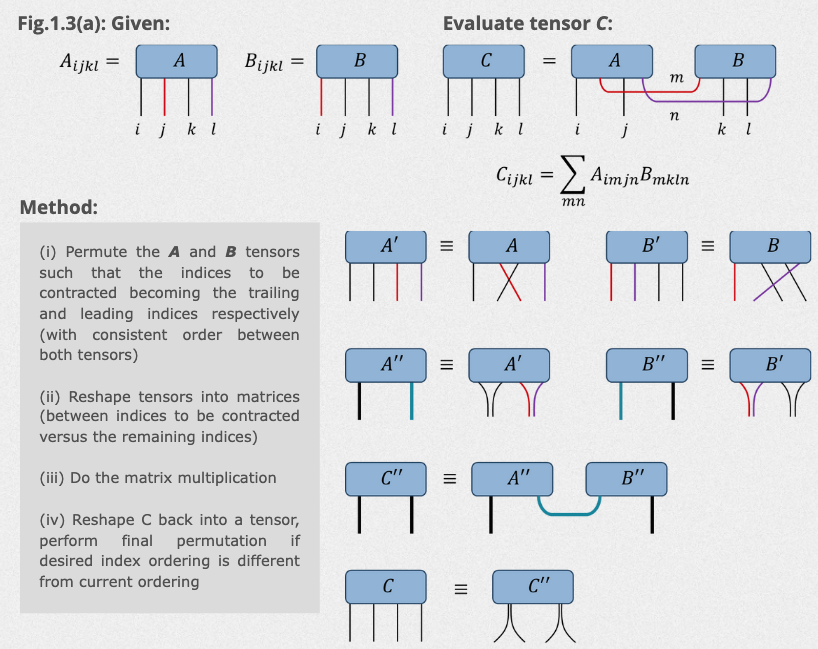

In [4]:
##### Ex.1.3(a): Binary Tensor Contraction
d = 10
A = np.random.rand(d,d,d,d)  
B = np.random.rand(d,d,d,d)

Ap  = A.transpose(0,2,1,3);  Bp = B.transpose(0,3,1,2)
App = Ap.reshape(d**2,d**2); Bpp = Bp.reshape(d**2,d**2)
Cpp = App @ Bpp;             C   = Cpp.reshape(d,d,d,d)

## T1.4: Contraction costs

The computational cost of multiplying a d1-by-d2 dimensional matrix A with a d2-by-d3 dimensional matrix B is: cost(A×B) = d1∙d2∙d3. Given the equivalence with matrix multiplication, this is also the cost of a binary tensor contraction (where each dimension d1, d2, d3 may now result as the product of several tensor indices from the reshapes).

 

Another way of computing the cost of contracting A and B is to take the product of the total dimensions, denoted |dim(A)| and |dim(B)|, of each tensor divided by the total dimension of the contracted indices, denoted |dim(A∩B)|. Examples are given below:
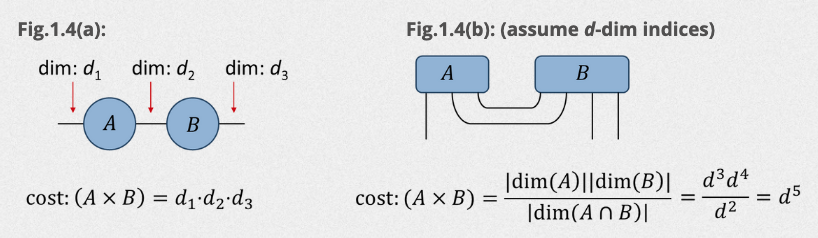

Broadly speaking, there are two approaches that could be taken to contract a network containing N>2 tensors: (i) in a single step as a direct summation over all internal indices of the network or (ii) as a sequence of N-1 binary contractions. In practice we prefer the latter option, which is either computationally cheaper or an equivalent cost as the former option. Examples:
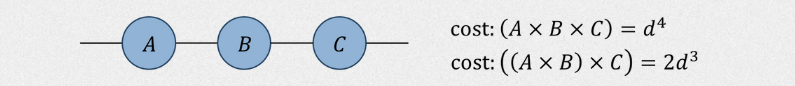

In [5]:
##### Ex.1.4(c): Tensor network evaluation
d = 10
A = np.random.rand(d,d) 
B = np.random.rand(d,d)
C = np.random.rand(d,d)
# Evaluare network via summation over internal indices
F0 = np.zeros((d,d))
for di in range(d):
    for dj in range(d):
        for dk in range(d):
            for dl in range(d):
                F0[di,dj] = F0[di,dj] + A[di,dk]*B[dk,dl]*C[dl,dj]


Fig.1.4(c), which represents a product of three matrices, illustrates that it is more efficient (in terms of the total number of scalar multiplications) to evaluate the network as a sequence of binary contractions than as a single summation over all internal indices.
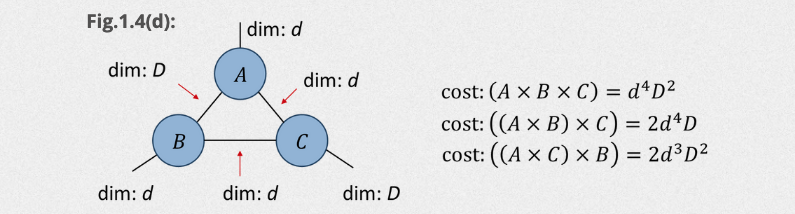


Fig.1.4(d) illustrates that the total cost of contracting a tensor network can depend on the sequence of binary contractions used; here the optimal sequence depends on whether D is larger than d.



## T1.5: Contraction of tensor networks

Given a tensor network composed of N tensors, there are two distinct steps needed to contract the network efficiently:

- determine the optimal sequence of the (N-1) binary tensor contractions,

- evaluate each of the binary contractions in turn as a matrix multiplication by taking the proper tensor permutes and reshapes.

**Notes: determining the optimal contraction sequence:**


- Usually we refer to the ‘optimal’ sequence at that which minimizes the number of scalar multiplications, but one could also seek to minimize the size of intermediate tensors used in the contraction (if the calculation was memory limited). Often, though not always, these two criteria will coincide.



- Given a tensor network with only a few tensors it is often easy to find the optimal sequence ‘manually’ through inspection of the network. For more complicated networks with a large number of tensors it may be necessary to employ an automated search algorithm such as this.
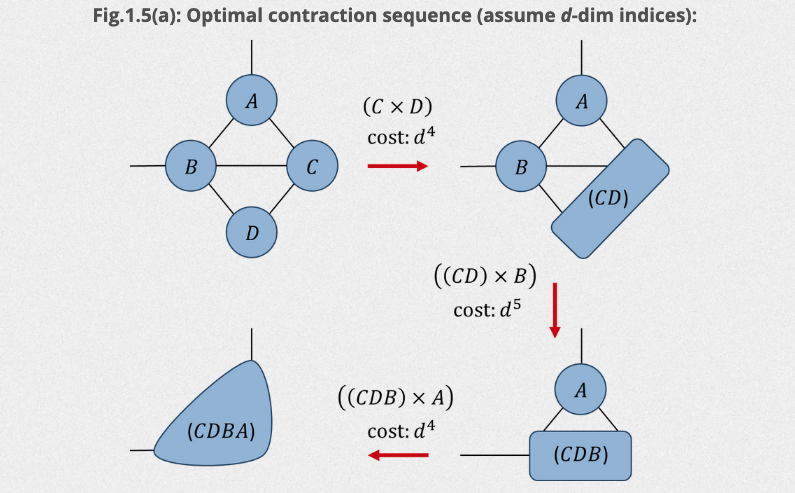


Once the optimal contraction sequence has been determined, a network can be evaluated by implementing each of the binary contractions in turn. However, using ‘reshape’ and ‘permute’ commands for each binary tensor contraction, although computationally effective, has two significant drawbacks: (i) it results in lengthy code that is error prone and difficult to check and (ii) it does not allow for the contraction sequence to be easily changed (as, in general, the entire code for the contraction would need to be rewritten to accommodate a different ordering).



**Network contractor ‘ncon’:**

The ‘ncon’ function is a useful tool to lessen the programming effort required to implement a tensor network contraction. This function works by automatically performing a desired sequence of permutes, reshapes and matrix multiplications required to evaluate a tensor network. The ‘ncon’ code and detailed instructions for its usage can be found [here](https://arxiv.org/abs/1402.0939), or alternatively the code is also presented on the example code [page](https://www.tensors.net/code). The first step in using ‘ncon’ to evaluate a network is to make a labelled diagram of the network such that:​



- Each internal index is labelled with a unique positive integer (typically sequential integers starting from 1, although this is not necessary).


- External indices of the diagram (if there are any) are labelled with sequential negative integers [-1,-2,-3,…] which denote the desired index order on the final tensor (with -1 as the first index, -2 as the second etc).



Following this, the ‘ncon’ routine is called as follows,



 

  **OutputTensor = ncon(TensorArray, IndexArray, ContOrder),**


with input arguments defined:

- **TensorArray**: 1D cell array containing the tensors comprising the network



- **IndexArray**: 1D cell array of vectors, where the kth element is a vector of the integer labels from the diagram on the kth tensor from ‘TensorArray’ (ordered following the corresponding index order on this tensor).



- **ContOrder**: a vector containing the positive integer labels from the diagram, used to specify order in which ‘ncon’ contracts the indices. Note that ‘ContOrder’ is an optional input that can be omitted if desired, in which case ‘ncon’ will contract in ascending order of index labels.

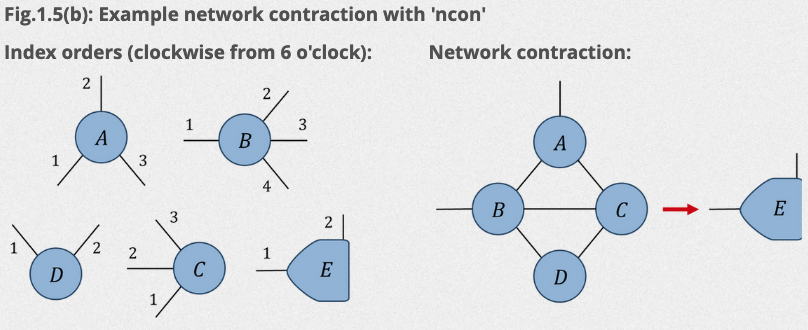
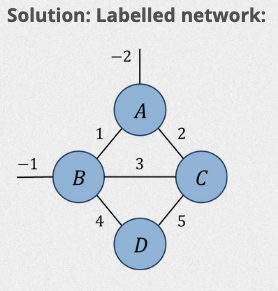

In [6]:
!pip install ncon

In [7]:
##### Ex.1.5(b): Contraction using ncon
from ncon import ncon
d = 10
A = np.random.rand(d,d,d); B = np.random.rand(d,d,d,d)
C = np.random.rand(d,d,d); D = np.random.rand(d,d)

TensorArray = [A,B,C,D]
IndexArray = [[1,-2,2],[-1,1,3,4],[5,3,2],[4,5]]


**Notes on ncon**



-If a pair of tensors is connected via multiple indices then 'ncon' will perform the contraction as a single multiplication (as opposed to contracting each index sequentially).



-Can be used to evaluate partial traces (see example below).



-Can be used to combine disjoint tensors into a single tensor (see example below). 
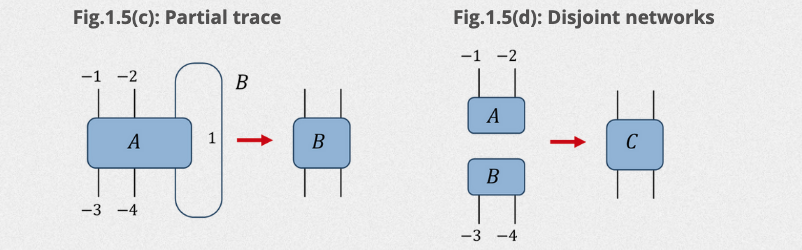

In [8]:
##### Ex.1.5(c): Partial trace
d = 10
A = np.random.rand(d,d,d,d,d,d)

B = ncon([A],[[-1,-2,1,-3,-4,1]])

##### Ex.1.5(d): Disjoint networks
d = 10
A = np.random.rand(d,d)
B = np.random.rand(d,d)

C = ncon([A,B],[[-1,-2],[-3,-4]])




## Problem Set 1:

### Pb.1(a):

find the optimal contraction sequence for this network (assume all indices are of equal dimension d).

what is the leading order computational cost of this contraction? Express your answer as a power of d.
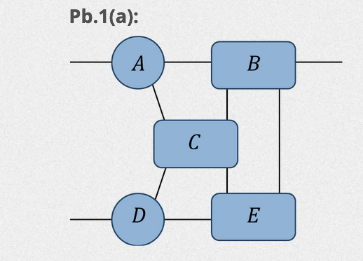


### Pb.1(b)

Initialize rank-3 random tensors A, B, C (assuming all indices are dimension d = 20). Write code to evaluate the network contraction (using the specified index orders) in three different ways: 


- As a single summation ​​over all internal indices using FOR loops.

- As a sequence of binary contractions implemented using 'permute' and 'reshape'.

- Using the 'ncon' routine.


Check that all three approaches produce the same output tensor D, and compare their respective computation times. 
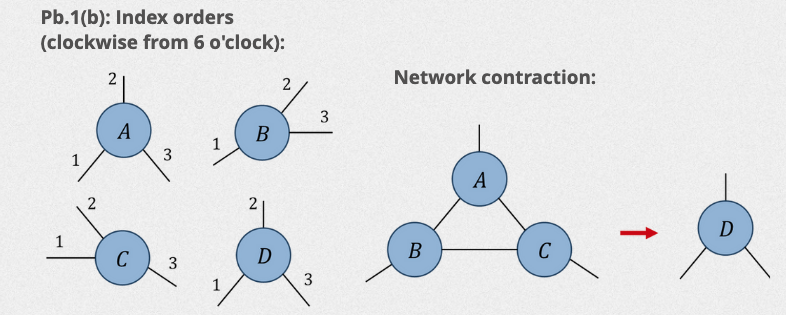